# 2.4 Aplicación UMAP

##### Dataset utilizado: Breast Cancer Wisconsin (Diagnostic) Data Set

c:\Users\sofia\OneDrive\Documentos\UVG\6to semestre\Mineria de datos\Lab2-Mineria\.venv-1\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


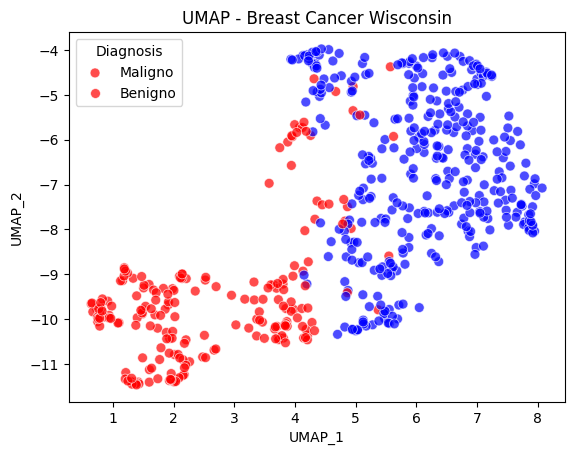

Distancia entre centroides M y B: 4.46
diagnosis
B    357
M    212
Name: count, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll, make_circles, make_moons
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from umap import UMAP
import seaborn as sns
import warnings
import seaborn as sns

#carga y limpieza de datos
df_data = pd.read_csv("../data/breastcancer/data.csv")
df_clean = df_data.copy()
df_clean.drop(columns=['id', 'Unnamed: 32'], inplace=True)

X = df_clean.drop(columns=['diagnosis'])
y = df_clean['diagnosis']

#estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#aplicacion UMAP
reducer = UMAP(
    n_components=2,         #reduce a visualizacion 2D  
    n_neighbors=15,         #numero de vecinos
    min_dist=0.05,          #distancia minima entre los puntos
    metric='euclidean',     #metrica de distancia
    random_state=42
)


#visualizacion
embedding = reducer.fit_transform(X_scaled)

df_embedding = pd.DataFrame(embedding, columns=['UMAP_1', 'UMAP_2'])
df_embedding['diagnosis'] = y.values

plt.figure()
sns.scatterplot(
    data=df_embedding,
    x='UMAP_1',
    y='UMAP_2',
    hue='diagnosis',
    palette={'M': 'red', 'B': 'blue'},
    alpha=0.7,
    s=50
)
plt.title('UMAP - Breast Cancer Wisconsin')
plt.legend(title='Diagnosis', labels=['Maligno', 'Benigno'])
plt.show()

#analisis de distancia entre centroides
centroid_M = df_embedding[df_embedding['diagnosis']=='M'][['UMAP_1','UMAP_2']].mean()
centroid_B = df_embedding[df_embedding['diagnosis']=='B'][['UMAP_1','UMAP_2']].mean()
distancia = np.linalg.norm(centroid_M.values - centroid_B.values)
print(f"Distancia entre centroides M y B: {distancia:.2f}")

# Verificar cuántas muestras de cada clase hay
print(df_embedding['diagnosis'].value_counts())


